In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
states = []
with open('../phased_ihart_complex_families/AU3199.phased.txt', 'r') as f:
    header = next(f).strip().split('\t')[1:-2] # skip header
    states = []
    chroms = []
    mult = []
    for line in f:
        pieces = line.strip().split('\t')
        chroms.append(int(pieces[0][3:]))
        states.append(list(map(int, pieces[1:-2])))
        mult.append(int(pieces[-1])-int(pieces[-2]))
        assert len(states[-1]) == len(header)
states = np.array(states).T
chroms = np.array(chroms)
mult = np.array(mult)
print(np.sum(mult[states[-1, :]!=0])/np.sum(mult))


0.22925683929208532


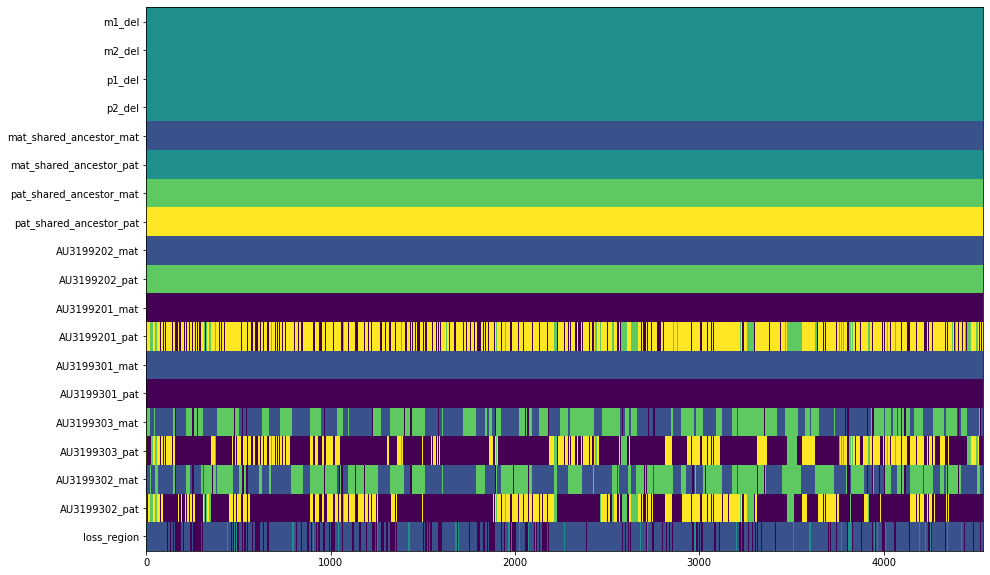

In [12]:
plt.figure(figsize=(15, 10))
plt.imshow(states[:, states[10, :]==-1], aspect='auto')
plt.yticks(np.arange(len(header)), header)
plt.show()

In [11]:
share_mat = states[10, :]==0
share_pat = states[11, :]==2
print(np.sum((share_mat & share_pat)*mult)/np.sum(mult))
print(np.sum(((share_mat & ~share_pat) | (~share_mat & share_pat))*mult)/np.sum(mult))


0.005715677151584599
0.14259674892806098
